# **Importando as Bibliotecas;**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import warnings  
warnings.filterwarnings('ignore')

# **Importando um DataSet do GoogleDrive para o Colab;**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/datasets/kc_house_data.csv'


In [106]:
!ls '/content/drive/My Drive/datasets'

kc_house_data.csv  produtos.csv


# **Selecionando o DataSet;**

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/datasets/kc_house_data.csv')

# **Analisando as Features;**

In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(16)
memory usage: 3.1 MB


# **Exibindo o DataSet;**

In [19]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Descrição do DataSet;**

In [53]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



# **Descrição das Features;**


**Id:** a notation for a house

**Date:** Date house was sold

**Price:** Price is prediction target

**Bedrooms:** Number of Bedrooms/House

**Bathrooms:** Number of bathrooms/House

**Sqft_Living:** square footage of the home

**Sqft_Lot:** square footage of the lot

**Floors:** Total floors (levels) in house

**Waterfront:** House which has a view to a waterfront

**View:** Has been viewed

**Condition:** How good the condition is ( Overall )

**Grade:** overall grade given to the housing unit, based on King County grading system

**Sqft_Above:** square footage of house apart from basement

**Sqft_Basement:** square footage of the basement

**Yr_Built:** Built Year

**Yr_Renovated:** Year when house was renovated

**Zipcode:** Zip

**Lat:** Latitude coordinate

**Long:** Longitude coordinate

**Sqft_Living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**Sqft_Lot15:** lotSize area in 2015(implies-- some renovations)



# **Eliminando as colunas que julgamos desnecessárias;**

In [0]:
dataset = dataset.drop(['id','date'],axis=1)

# **Exibindo o DataSet sem as colunas removidas;**


In [21]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Convertendo a Coluna 'bathrooms' para Inteiro;**

In [67]:
dataset['bathrooms'] = dataset['bathrooms'].astype(int)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Convertendo a coluna 'floors' para Inteiro;**

In [68]:
dataset['floors'] = dataset['floors'].astype(int)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# **Média de Quartos do DataSet;**

In [111]:
print("Média de Quartos:", dataset['bedrooms'].mean())

Média de Quartos: 3.37084162309721


# **Número de Quartos**


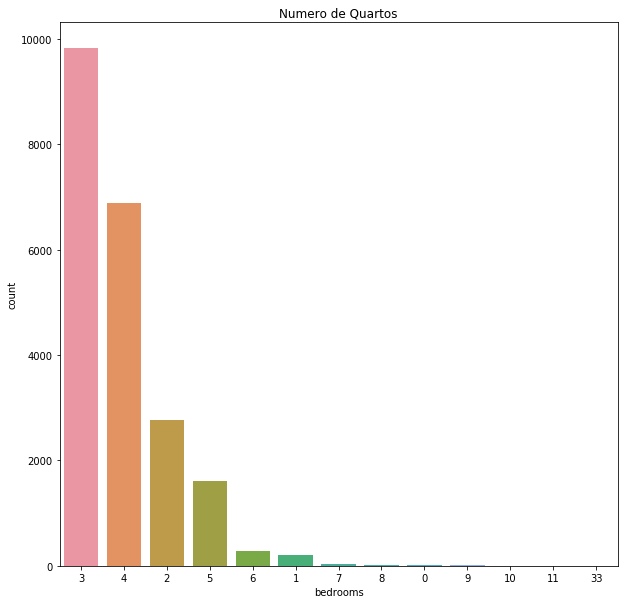

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'bedrooms', data=dataset, order=dataset['bedrooms'].value_counts().index)
plt.title("Numero de Quartos")
plt.show()

# **Média de Banheiros do DataSet;**

In [114]:
print("Média de Banheiros:", dataset['bathrooms'].mean())

Média de Banheiros: 1.7497339564151206


# **Número de Banheiros**

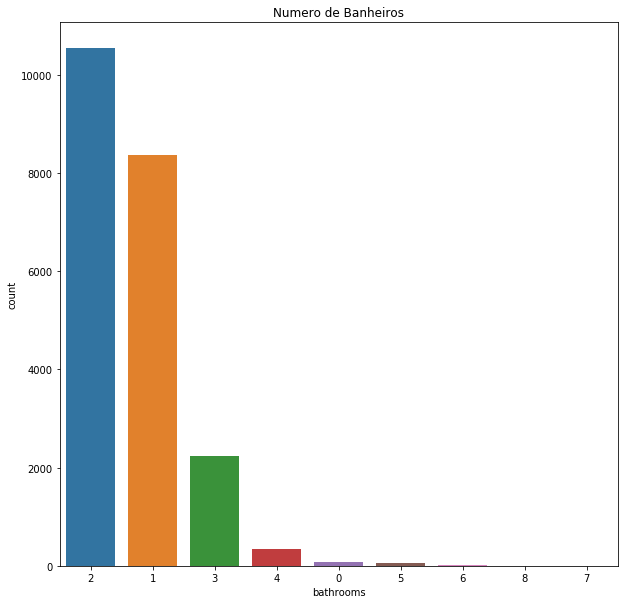

In [79]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'bathrooms', data=dataset, order=dataset['bathrooms'].value_counts().index)
plt.title("Numero de Banheiros")
plt.show()

# **Média de Grade do DataSet;**

In [115]:
print("Média de Grade:", dataset['grade'].mean())

Média de Grades: 7.656873178179799


# **Número de Grades**

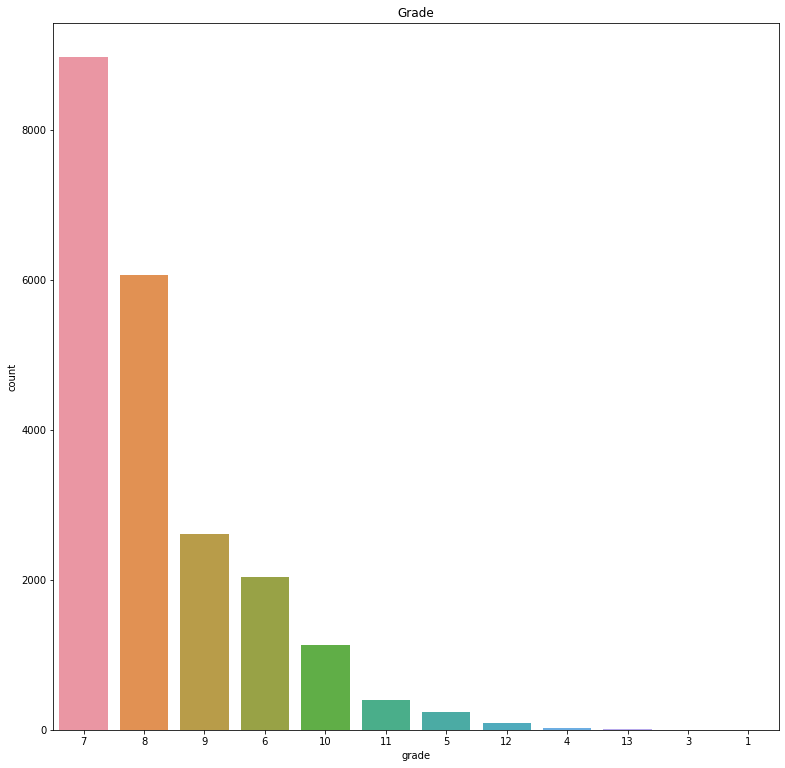

In [81]:
plt.figure(figsize=(13,13))
sns.countplot(x = 'grade', data=dataset, order=dataset['grade'].value_counts().index)
plt.title("Grade")
plt.show()

# **Média de Condição;**

In [116]:
print("Média de Condição:", dataset['condition'].mean())

Média de Condição: 3.4094295100171195


# **Condition**

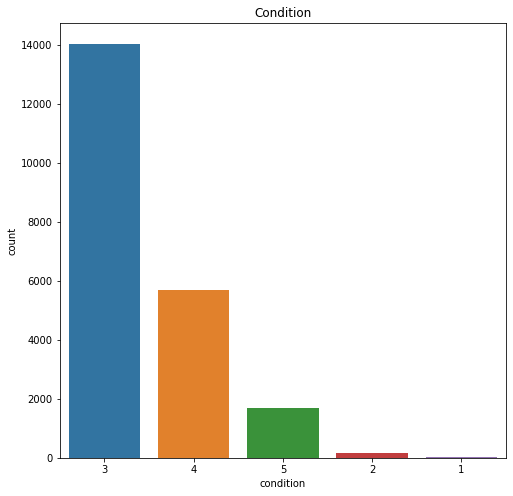

In [78]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'condition', data=dataset, order=dataset['condition'].value_counts().index)
plt.title("Condition")
plt.show()

# **Ano da Construção;**

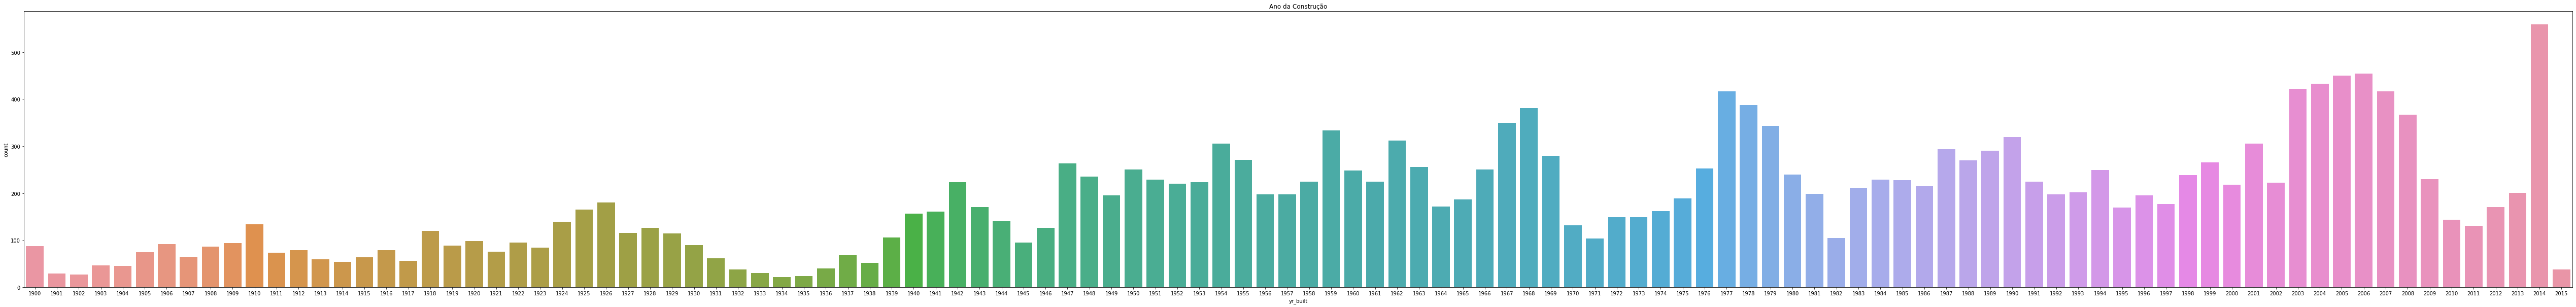

In [118]:
plt.figure(figsize=(90,10))
sns.countplot(x = 'yr_built', data=dataset)
plt.title("Ano da Construção")
plt.show()

# **Ano da Construção (Orednado);**

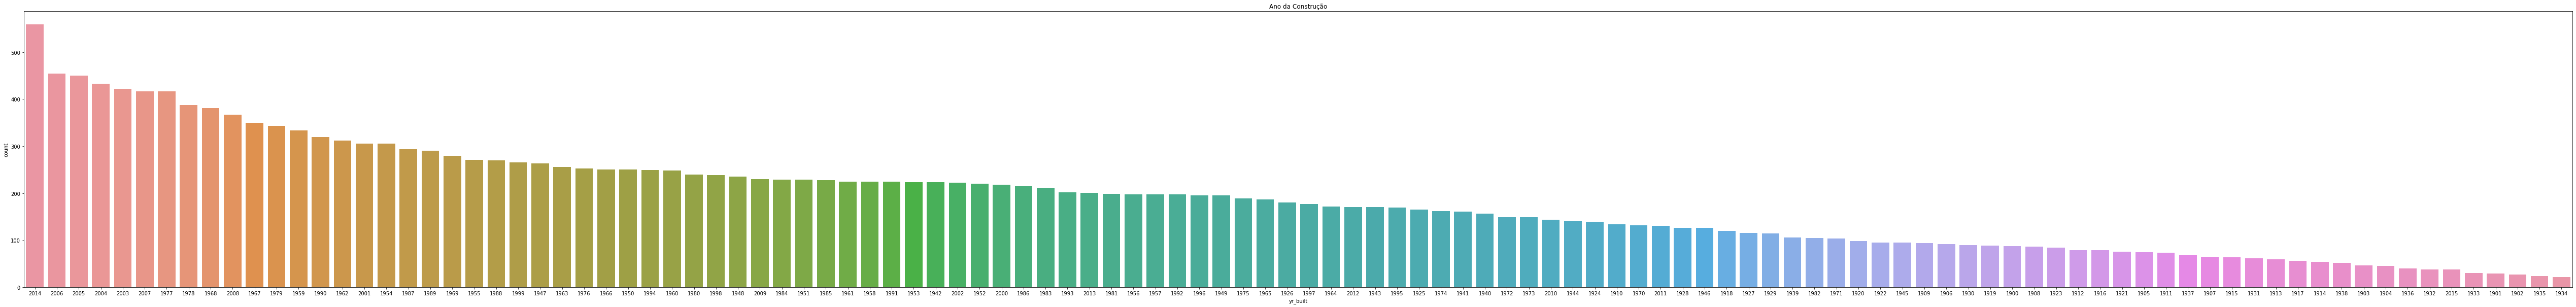

In [119]:
plt.figure(figsize=(90,10))
sns.countplot(x = 'yr_built', data=dataset, order=dataset['yr_built'].value_counts().index)
plt.title("Ano da Construção")
plt.show()

# **Verificando as correlações entre as features;**

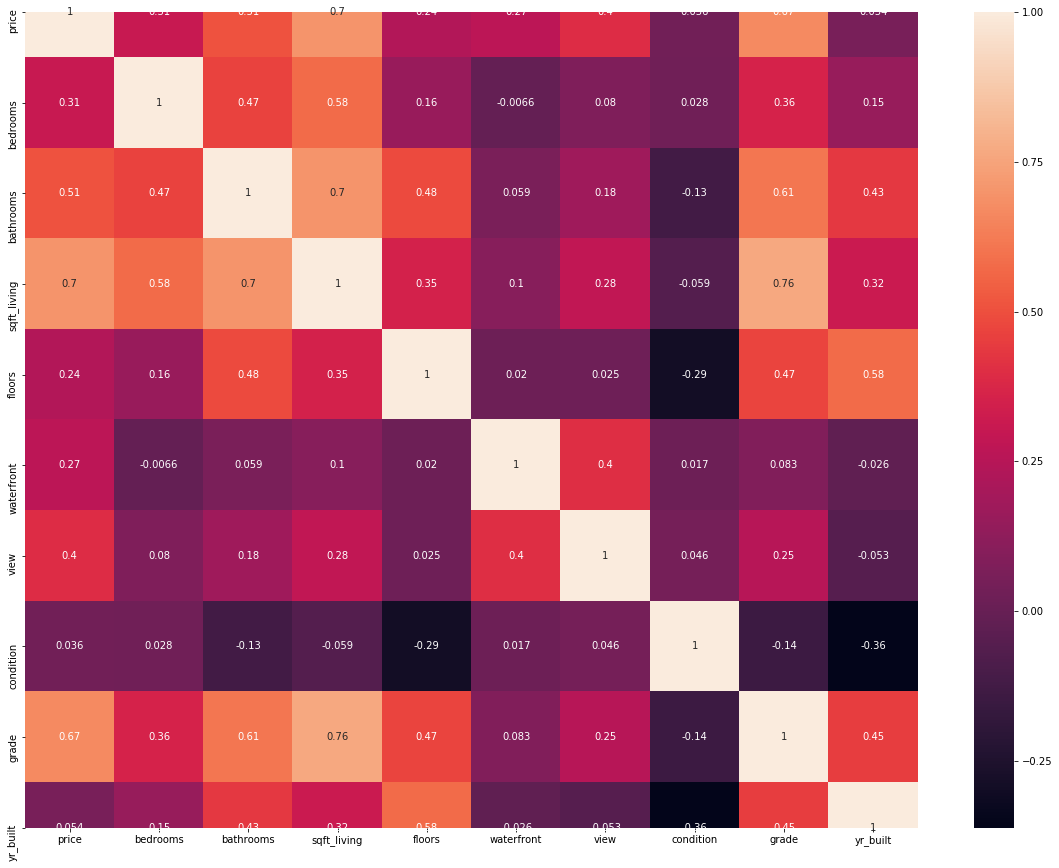

In [87]:
plt.figure(figsize=(20,15))
columns =['price','bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','yr_built']
sns.heatmap(dataset[columns].corr(),annot=True)

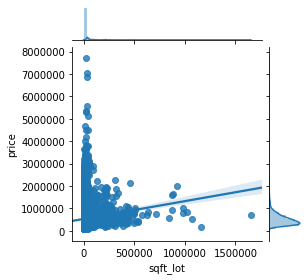

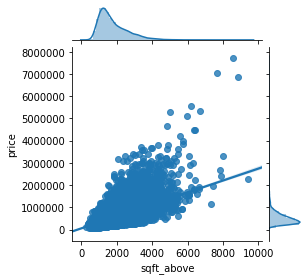

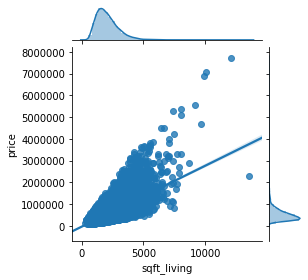

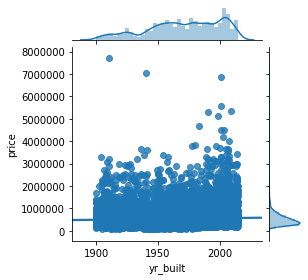

In [96]:
sns.jointplot(x='sqft_lot',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_above',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_living',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',size=4)

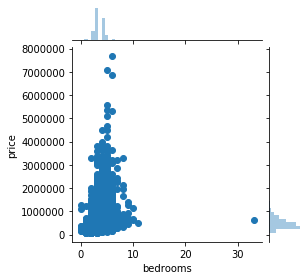

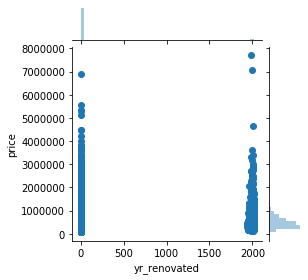

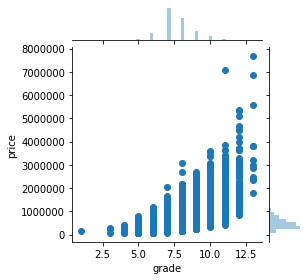

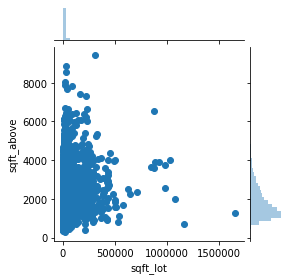

In [97]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',size=4)

# **Separando as varaveis independentes da variavel: Preço**

In [0]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

# **Dividindo o DataSet entre Treino e Teste**

In [0]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# **Treinando o modelo**

# **Modelo de Regressão Linear Multipla**

In [0]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

# **Modelo de Arvore de Decisão**

In [0]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

# **Modelo Random Forest Regression**

In [0]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

# **Comparando os Modelos**


In [123]:
print("Modelo de Regressão Linear Multipla: ",round(mlr.score(X_test,y_test)*100))
print("Modelo de Arvore de Decisão: ",round(tr_regressor.score(X_test,y_test)*100))
print("Modelo de Random Forest Regression: ",round(rf_regressor.score(X_test,y_test)*100))


models_score =pd.DataFrame({'Model':['Regressão Linear Multipla','Arvore de Decisão','Random Forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]})
models_score.sort_values(by='Score',ascending=False)

Modelo de Regressão Linear Multipla:  69.0
Modelo de Arvore de Decisão:  74.0
Modelo de Random Forest Regression:  88.0


,Model,Score,Explained Variance Score
2,Random Forest Regression,0.883476,0.851803
1,Arvore de Decisão,0.742804,0.713761
0,Regressão Linear Multipla,0.689823,0.533017
